In [121]:
import inkml.inkml2img as conv
import subprocess
import os

from processing import label_segments, plot_image, plot_numbered_image
from processing import convert_inkml, crop_image
from clf import get_clf

import warnings  #suppress warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from prep_HASYv2 import *

In [ ]:
from keras.datasets import mnist
(X_tr,y_tr),(X_ts,y_ts) = mnist.load_data()
yhat, acc, fitted_clf = get_clf(X_tr, X_ts, y_tr, y_ts)

### convert INKml to png

good matrix file indices:
82
8


In [3]:
directory = 'INKdata/MatricesTrain2014/'
out_folder= './MatricesTrain_png/'
#convert_inkml(directory,out_folder)
# directory = 'INKdata/trainData_2012_part1/'
# out_folder= './train2012_png/'


In [187]:
#get list of png files
png_files = []
f = os.popen("ls %s" %out_folder)
for i in f.readlines():
    png_files.append(out_folder + i[:-1])
f.close()    
# png_files

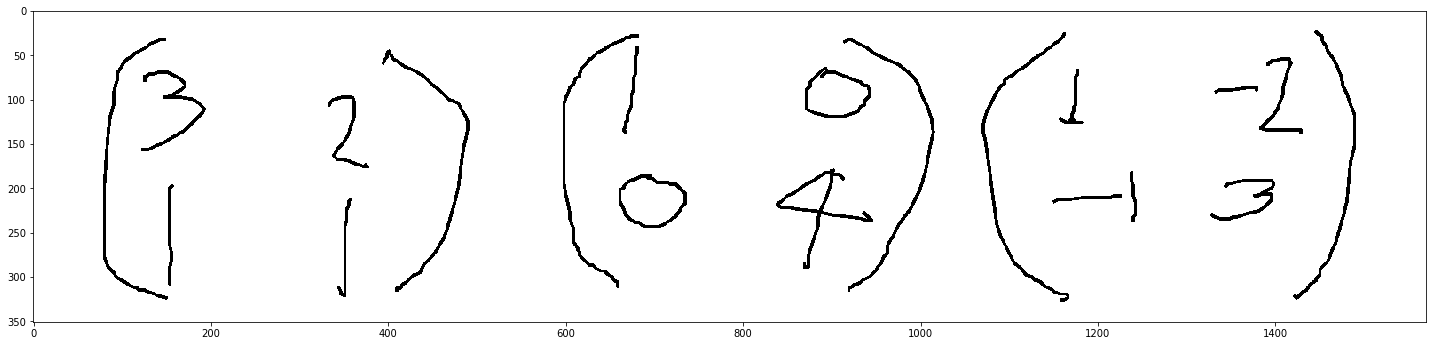

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


number of segments 20
index:  106


In [265]:
# index = 53
index = np.random.randint(len(png_files))
matname = 'images/matrix'+str(index)
# index=579 for firstsetonly
filename = png_files[index]
binary_arr,label_arr, segments = label_segments(filename,matname)
print("index: ",index)

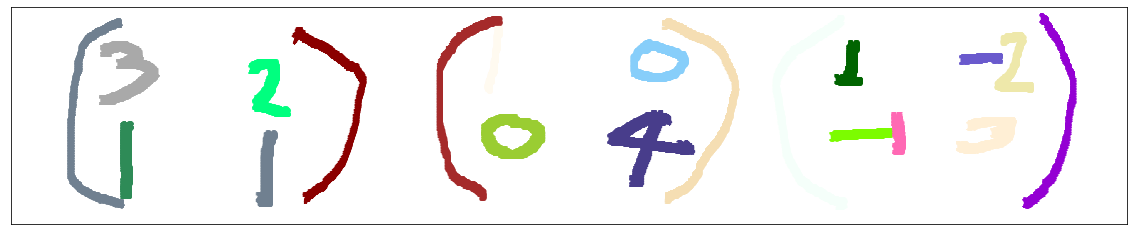

In [266]:
##unnecessary but "pretty"
plot_numbered_image(label_arr,matname)

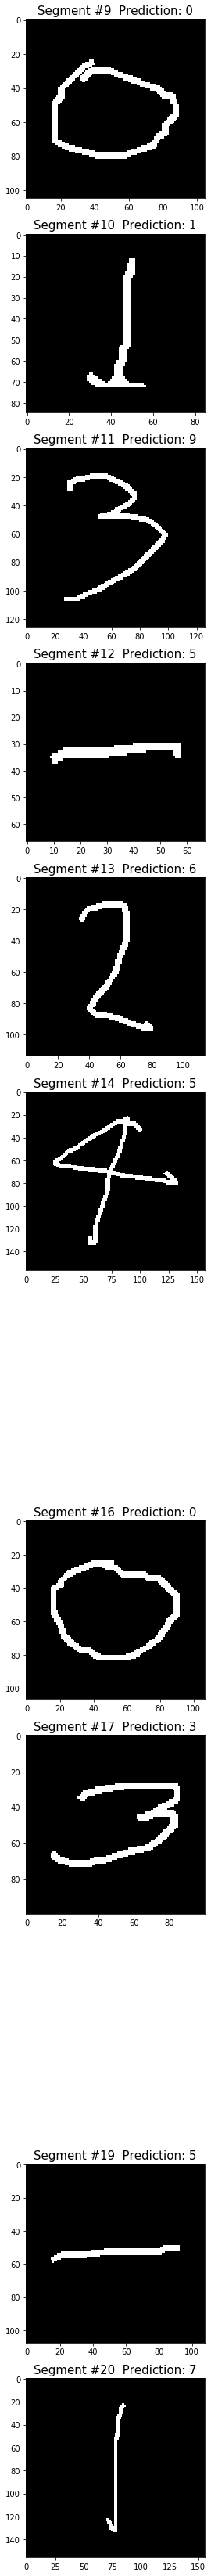

In [267]:
newdir = 'tempimgs/'
fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
for seg,ax in list(zip(segments,axes.flatten())):
    crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=fitted_clf,direc=newdir)
fig.savefig(matname+'_predictions.png')
!rm $newdir*

In [268]:
img,prediction,xmin,digit = crop_image(19,label_arr,binary_arr,ax=ax,plot=True,model=fitted_clf,direc=newdir)

In [270]:
for row in img: print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0 148 148 255 255 255 255 255 255
 255 255 255 253 255 255   0   0   0   0]
[  0   0   0   0 255 255 255 255 255 255 148 162   0   0   0   0   0   0
   0   0   0   3   0   0   0   0   0   0]
[0 0 0 0 1 0 0 0

In [180]:
## THIS IS TRASH
# newdir = 'tempimgs/'
# fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
# for seg,ax in list(zip(segments,axes.flatten())):
#     crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=hasy_clf,direc=newdir)
# fig.savefig(matname+'_predictions__HASY.png')
# !rm $newdir*

In [235]:
indices = list(np.arange(len(X_ts)))
sel = np.random.choice(indices,4,replace=False)
for ind in sel:
    del indices[ind]
len(indices)

9996

In [249]:
def grab_indices(indices,n,index_list):
    indices = list(np.arange(len(X_ts)))
    sel = np.random.choice(indices,4,replace=False)
    for ind in sel:
        del indices[ind]
    index_list.append(sel)
    del sel
    return indices,index_list

In [258]:
labeled = list(zip(X_ts[index_list[0]],y_ts[index_list[0]]))

In [259]:
labeled

[(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,  19, 154, 253, 226,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,  26, 169, 225, 252, 252, 125,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0, 104, 222, 253, 252, 252, 177,   0,   0,   0,   0,   0, 

<module 'PIL.Image' from '/home/nina/anaconda3/lib/python3.7/site-packages/PIL/Image.py'>